<a href="https://colab.research.google.com/gist/jonghank/f8736243d30155737b55b19918aca8e7/ase3001_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

---


## Supervised learning

- 입력벡터 $x\in\R^d$와 출력값 $y\in\R$가 대략적으로 아래와 같은 관계를 갖는다고 하자.

$$
y \approx f(x)
$$

- 입력벡터 $x$를 _independent variable_ 또는 _feature vector_ 라고 부른다.

- 출력값 $y$는 _outcome_, _response_, _target_, _label_, 또는 _dependent variable_ 이라 부른다. 보통 $y$가 머신러닝 모델을 통해 예측하고자 하는 값이 된다.

- 실제로는 $x$와 $y$ 사이의 정확한 관계는 알 수 없는 경우가 대부분이다.


<br>

## Features

머신러닝 모델의 입력 벡터 $x$는 입력 데이타의 특징들을 수치화한 벡터이다.:

_문서 데이타:_

- 문서의 경우, 정해진 사전에 포함된 단어들 각각에 대해 해당 문서에 나타나는 빈도를 수치화한 _word count histogram_ 을 feature vector로 사용할 수 있다.

_환자 데이타:_

- 환자의 개인정보 및 검사결과 등을 수치화하여 feature vector로 사용할 수 있다.

_고객 데이타:_

- 고객 각각의 물품 구매이력과 고객의 개인정보 등을 수치화하여 feature vector로 활용할 수 있다.

<br>

### Where features come from

- 이미지, 비디오, 오디오, 문서 등, 입력에 사용되는 실제 데이타(수치화되지 않았을 수도 있음)를 $u$라고 부르자.

- 실제 데이타와 피처 벡터는 $x = \phi(u)$와 같은 관계로 정의하며, 이 함수 $\phi$를 _embedding_ 또는 _feature function_ 이라 한다.

- 임베딩 함수 $\phi$는 단순할 수도 있으며 매우 복잡할 수도 있다.

- 마찬가지로 출력에 대해서도 수치화되지 않은 실제 데이타 $v$와 모델 출력값 $y$의 관계를 $y=\psi(v)$와 같은 임베딩 함수로 표현한다.


<br>

### Data and prior knowledge

- 짝지어진 $n$쌍의 데이타 세트를 $x^{(t)},\dots,x^{(n)} \in \R^d$와 $y^{(1)},\dots,y^{(n)} \in \R$로 표현하자.

- $(x^{(i)},y^{(i)})$는 $i$번째 _data pair_  , _observation_ , _example_ 라고 할 수 있다.

- 데이타 또는 데이타간의 관계에 대한 사전 정보(_prior knowledge_)가 활용될 수도 있다. 예를 들어 관계 함수 $f$가 연속적인 함수인지, 또는 출력 $y$가 항상 양수인지 등의 사전정보를 활용하면 머신러닝 예측 성능을 개선할 수도 있다.


<br>

## Predictor

- 예측기(_predictor_) 또는 모델(_model_)을 $g:\R^d \rightarrow \R$와 같이 정의한다.

- 예측기는 피처 벡터 $x$로부터 출력 $y$를 예측해내는 역할을 하며, 예측기의 출력값을 $\hat{y}$로 표현한다. 즉, $\hat{y} = g(x)$로 표현한다.

- 주어진 데이타와 사전지식을 활용하여 예측기 $g$가 주어진 데이타를 잘 설명하도록 $g$를 정하는 일을 머신러닝 모델을 학습한다고 한다.

- 수치화되지 않았던 날것의 데이타들로는 아래와 같은 관계로 설명할 수 있다.

$$
\hat v = \psi^{-1}\left(g\left(\phi(u)\right)\right)
$$

- 예측치 $\hat y^{(i)}$와 실제 출력값 $y^{(i)}$가 가깝다면, 즉 $\hat y^{(i)} \approx y^{(i)}$라면, 예측기가 $i$번째 데이타를 잘 설명한다고 할 수 있다.

- 그러나 실제로 머신러닝 문제의 목표는 학습 과정에서 보지 못했던 데이타에 대해서도 $\hat y \approx y$를 잘 만족하도록 하는 모델을 설계하는 것이다.

<center>
<img src="https://jonghank.github.io/ase3001/files/raw_data.png" width="400">
<img src="https://jonghank.github.io/ase3001/files/polynomial_fit.png" width="400">
</center>



<br>

### Information flow

<center>
<img src="https://jonghank.github.io/ase3001/files/information_flow.png" width="600">
</center>


<br>


---

## Linear predictor

- 아래와 같이 피처 벡터 $x$에 대한 선형함수로 표현되는 선형 예측기가 널리 사용된다.

$$
 g(x) =  \theta^T x
$$
여기서 벡터 $\theta\in \R^d$는 예측기를 표현하는 파라미터로, _predictor parameter vector_ 라고 한다.

- 이와 같은 모델을 _regression model_ 이라고도 부른다.

- $x_j$는 $j$번째 피처 성분을 믜미하며, 예측기의 출력값은 피처들의 선형 조합으로 표현된다.

$$
\hat y = g(x) = \theta_1 x_1 + \cdots + \theta_d x_d
$$

- 이제, 예측기 설계 문제는 주어진 데이타를 가장 잘 설명하는 예측기 파라미터 벡터 $\theta \in \R^d$를 고르는 문제가 된다.

- 예측기가 $\theta$로 설명되므로, $g_\theta(x)$로 표현하기도 한다.



<br>

### Interpreting a linear predictor

$$
\hat y = g(x) = \theta_1 x_1 + \cdots + \theta_d x_d
$$

- 예를 들어, $\theta_3$는 세 번째 피처 $x_3$의 증가에 따라 예측값 $\hat y = g(x)$가 증가하는 비율로 이해할 수 있다.

- 예를 들어, $\theta_7=0$은 일곱번째 피처가 예측값에 아무런 영향을 주지 못한다는 의미가 된다.

- $\theta$의 크기가 작다는 것은 예측기가 $x$의 변화에 민감하지 않다는 뜻이 된다:

$$
|g(x)-g(\tilde x)| = \left| \theta^T x - \theta^T \tilde x \right|
= \left| \theta^T (x - \tilde x) \right| \leq \|\theta \|\; \|x-\tilde x\|
$$



<br>

### Affine predictor

- 만약 우리가 첫번째 피처 $x_1$을 상수 1로 지정했다고 하면, 선형 예측기는 나머지 피처 $x_{2:d}$에 대한 _affine function_ 이 된다.

$$
g(x) = \theta ^T  x = \theta_1 + \theta_2 x_2 + \cdots+ \theta_dx_d
$$

- 이 때, 첫번째 파라미터 $\theta_1$를 예측기의 _offset_ 또는 _constant term_ 이라고 부른다. 이 파라미터는 나머지 모든 피처가 0일 때의 예측값을 의미하기도 한다.


<br>

---

## Empirical risk minimization


<br>

### Loss function

- 예측 모델의 정확도를 표현하기 위해, 다음과 같이 _loss function_ 또는 _risk function_, $\loss:\R \times \R \to \R$ 정의하여 $\hat y$와 $y$의 차이를 정량화한다.

- 여기서 $\loss(\hat y, y)$는 예측값 $\hat y$가 얼마나 실제 출력값 $y$와 가까운지를 표현한다.

- 통상적으로 모든 $\hat y$, $y$에 대해 $\loss(y,y)=0$ 이며$\loss(\hat y,y)\geq 0$이다.

<br>

**Examples**

- _quadratic loss_:

$$\loss(\hat y, y) = (\hat y - y)^2$$

- _absolute loss_:

$$\loss(\hat y,y)=|\hat y-y|$$

- _fractional error_: for $\hat y, y >0$,

$$
  \loss(\hat y, y) = \max\left\{\frac{\hat y}{y}-1, \frac{y}{\hat y}-1\right\}
  = \exp \left(\abs{\log \hat y - \log y} \right) -1
$$
(100을 곱해 퍼센트 오차로 표현하기도 한다.)



<br>

### Empirical risk

예측기 $g$가 모든 데이타 $(x^{(i)},y^{(i)})$, $i=1, \ldots, n$에 대해 좋은 성능을 갖는 것이 바람직하므로, 아래와 같이 모든 데이타들에 대한 평균 loss 값으로 정의되는 _empirical risk_ 를 정의한다.

$$
\eloss = \frac{1}{n} \sum_{i=1}^n \loss \left( \hat y^{(i)} , y^{(i)} \right)
= \frac{1}{n} \sum_{i=1}^n \loss \left( g(x^{(i)}) , y^{(i)}\right)
$$

- 만약 $\eloss$가 작다면 주어진 데이타 세트에 대해 예측기의 성능이 좋다고 할 수 있다.

- 예측기가 파라미터 $\theta$로 표현되는 경우, 아래와 같이 구체적으로 표현할 수 있다.

$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \loss \left( g_\theta(x^{(i)}) , y^{(i)}\right)
$$


<br>

### Mean square error

- 제곱 함수로 표현되는 손실함수 $\loss (\hat y, y) = (\hat y-y)^2$가 적용되는 경우, empirical risk는 _mean-square error_ (MSE)가 된다.

$$
  \eloss = \text{MSE} =  \frac{1}{n} \sum_{i=1}^n \left(g(x^{(i)})- y^{(i)}\right)^2
$$

- 이 값에 제곱근을 취해 root-mean-square error,
$\text{RMSE} = \sqrt{\text{MSE}}$, 출력 $y^{(i)}$와 같은 단위를 갖는 값으로 예측기 평균 오차를 표현하기도 한다.


<br>

### Mean absolute error

- 절댓값으로 표현되는 손실함수 $\loss (\hat y, y) = |\hat y-y|$가 적용되면, empirical risk는 _mean-absolute error_ 가 된다.

$$
  \eloss = \frac{1}{n} \sum_{i=1}^n |g(x^i)- y^i|
$$

- 이 경우는 이 자체가 출력 $y^i$와 동일한 단위를 갖는다.
- 이는 위에서 정의한 mean-square error와 유사해 보이지만 많은 면에서 그렇지 않다.


<br>

### Empirical risk minimization

how do we pick our prediction rule $g$?

- 예측기 $g_\theta(x)$의 파라미터 $\theta$를 결정하는 것을 예측기를 데이타에 _fitting_ 한다고 부른다.

- 일반적으로 empirical risk $\eloss(\theta)$를 최소화하도록 예측기를 fiting하며, 이를 _empirical risk minimization (ERM)_ 이라 부른다. 즉, ERM은 $\eloss(\theta)$를 최소화하는 $\theta$를 찾는 작업이다.

- 즉, ERM을 통해 주어진 데이타를 가장 잘 설명할 수 있는 $\theta$를 정할 수 있다.

- 선형 예측기 $g_\theta(x)=\theta^T x$의 경우는 아래와 같은 함수를 최소화하는 $\theta$를 고르는 문제로 표현할 수 있다.

$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \loss (\theta^T x^{(i)} , y^{(i)})
$$

- 일반적으로 임의의 empirical risk를 최소화하는 파라미터 $\theta$를 찾는 문제는 해석적으로 해결하기 어려우며 수치적인 최적화 _numerical optimization_ 기법을 적용하여 해결한다.



<br>

---

## Least squares linear regression

- 예측기 파라미터 $\theta \in \R^d$를 갖는 선형 예측기 $\hat y = g_\theta(x) =  \theta^\tp x$를 가정하자.

- 손실함수는 제곱 함수로 $\loss(\hat y, y) = (\hat y - y)^2$ 정의하자.

- 그러면 empirical risk인 MSE는 아래와 같이 표현된다.

$$
\eloss(\theta) = \frac{1}{n} \sum_{i=1}^n \left(\theta^\tp x^{(i)} - y^{(i)}\right)^2
$$

-  ERM 문제는 예측기의 MSE를 최소화하는 $\theta$를 찾는 문제가 되며, 이와 같은 문제를 _linear least squares fitting_ 또는 _linear regression_ 이라 부른다.


<br>

### Least squares formulation

- MSE를 아래와 같이 행렬을 사용하여 표현해 보자.

$$
\begin{align*}
 \frac{1}{n} \sum_{i=1}^n (\theta^\tp x^{(i)} -y^{(i)})^2
 &= \frac{1}{n}\left\{ (\theta^Tx^{(1)}-y^{(1)})^2 + \cdots (\theta^Tx^n-y^n)^2 \right\} \\
 &= \frac{1}{n}\left\{ ((x^{(1)})^T\theta-y^{(1)})^2 + \cdots ((x^{(n)})^T\theta-y^{(n)})^2 \right\} \\
 &=\frac{1}{n} \left\|\, \bmat{(x^{(1)})^T\theta-y^{(1)} \\ \vdots \\ (x^{(n)})^T\theta-y^{(n)} }\, \right\|^2\\
 &=\frac{1}{n} \left\|\,\bmat{(x^{(1)})^T \\ \vdots \\ (x^{(n)})^T }\theta - \bmat{y^{(1)} \\ \vdots \\ y^{(n)}}\,\right\|^2\\
 &= \frac{1}{n} \norm{X \theta - y}^2
\end{align*}
$$

여기서 행렬 $X\in\R^{n \times d}$와 벡터 $y\in\R^n$는 주어진 데이타 세트를 이용해 아래와 같이 정의된다.

$$
X = \bmat{(x^{(1)})^\tp \\ \vdots \\ (x^{(n)})^\tp} \qquad y = \bmat{y^{(1)} \\ \vdots \\ y^{(n)}}
$$

- ERM 문제는 _least squares problem_ 표현됨을 확인할 수 있다. 즉, $\|X \theta - y\|^2$를 최소화하는 $\theta$를 찾음으로써 ERM 문제는 해결된다.  


<br>

### Least squares solution

- Least squares 문제는 주어진 $X$와 $y$에 대해 $\norm{X\theta-y}^2$를 최소화하는  $\theta$를 찾는 문제이다.

- 여기서 $X \in\R^{n \times d}$는 정사각형이거나 위아래로 긴 행렬이다 ($d \leq n$).

- $\norm{X\theta-y}^2$는 최소화하기 위한 목적함수 _objective function_ 라고 부른다.

- $X$의 컬럼들이 linearly independent columns하다면 목적함수를 최소화하는 최적해 $\theta$는 아래와 같이 찾을 수 있다.

$$
\theta^* = (X^\tp X)^{-1}X^\tp y= X^\dagger y
$$

- 참고로, 실제로는 $X^\dagger=(X^\tp X)^{-1}X^\tp$를 직접적으로 계산하지는 않고 QR 분해 등의 효율적인 방법을 통해 최적해를 계산할 수 있다.

- 예를 들어, Python에서는 `numpy`의 `numpy.linalg.lstsq` 함수를 통해 위와 동일한 최적해를 매우 효율적인 방법으로 얻을 수 있다.



<br>



---


## Numerical examples

<br>

### Polynomial fit

아래의 셀을 실행하면 실수 입력 데이타 $x$와 출력 데이타 $y$를 담고 있는 `csv` 파일을 로드한다. 이 데이타를 가지고 입력과 출력 사이의 관계를 찾아내 새로운 $x$가 들어오면 출력값을 예측할 수 있는 예측 모델을 만들려고 한다.

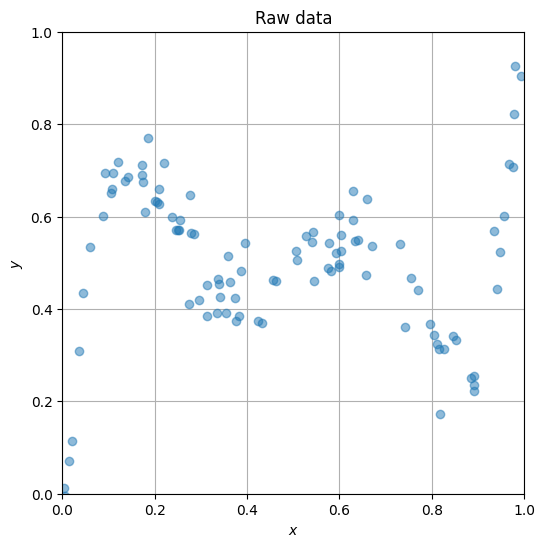

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('https://jonghank.github.io/ase3001/files/fit_data.csv', \
                  delimiter=',')
x, y = data[:,0], data[:,1]

plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'o', alpha=0.5)
plt.grid()
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Raw data')
plt.show()

주어진 데이타 $y$를 $x$에 대한 5차 다항식 모델로 fitting하기로 한다.

$$
\begin{align*}
  \hat{y} &= \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5 \\
  &= \bmat{1 & x & x^2 & x^3 & x^4 & x^5 }\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5}
\end{align*}
$$

모든 데이타에 대해 $\hat{y}$를 ${y}$에 가깝도록 만드는 $\theta = \bmat{\theta_0 & \cdots &  \theta_5}^T$를 찾으려고 하며, 이는 아래에 정의된 empirical risk를 최소화하는 $\theta$를 찾음으로써 해결된다.

$$
\begin{align*}
\eloss\left(\theta\right) &= \sum_{i=1}^{n} \left(\hat{y}^{(i)}-y^{(i)}\right)^2 \\
&= \sum_{i=1}^{n} \left( \bmat{1 & x^{(i)} & (x^{(i)})^2 & (x^{(i)})^3 & (x^{(i)})^4 & (x^{(i)})^5}
\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5} - y^{(i)} \right)^2 \\
&= \left\| \bmat{1 & x^{(1)} & (x^{(1)})^2 & (x^{(1)})^3 & (x^{(1)})^4 & (x^{(1)})^5 \\
1 & x^{(2)} & (x^{(2)})^2 & (x^{(2)})^3 & (x^{(2)})^4 & (x^{(2)})^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x^{(n)} & (x^{(n)})^2 & (x^{(n)})^3 & (x^{(n)})^4 & (x^{(n)})^5 }
\bmat{\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5} - \bmat{y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)}}  \right\|_2^2  \\
&= \left\| X \theta - y \right\|_2^2  \end{align*}
$$

여기서 행렬 $X$와 벡터 $y$는 아래와 같다.

$$
  X = \bmat{1 & x^{(1)} & (x^{(1)})^2 & (x^{(1)})^3 & (x^{(1)})^4 & (x^{(1)})^5 \\
1 & x^{(2)} & (x^{(2)})^2 & (x^{(2)})^3 & (x^{(2)})^4 & (x^{(2)})^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x^{(n)} & (x^{(n)})^2 & (x^{(n)})^3 & (x^{(n)})^4 & (x^{(n)})^5 }
, \qquad
y = \bmat{y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)}}
$$

In [ ]:
n = len(x)
d = 6

X = np.zeros((n,d))
for i in range(d):
  X[:,i] = x**i

theta_opt = np.linalg.lstsq(X, y, rcond=None)[0]

print(f'Optimal theta: {theta_opt}')

vp = np.linspace(0, 1, 100)

X_vp = np.zeros((len(vp),d))
for i in range(d):
  X_vp[:,i] = vp**i;

plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'o', alpha=0.5, label='Raw data')
plt.plot(vp, np.dot(X_vp, theta_opt), label='Predictor')
plt.grid()
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')
plt.title("Polynomial predictor")
plt.legend()
plt.show()

Optimal theta: [-1.08775601e-01  1.51579304e+01 -9.49190641e+01  2.39806312e+02
 -2.64399727e+02  1.05545151e+02]


<br>

### Diabete progression

아래의 셀은 442명의 환자에 대한 의료 정보를 담고 있으며, 각각의 row가 환자 1명의 데이타를 의미한다. 왼쪽 열 개의 컬럼은 나티, 성별, BMI 등, 환자의 정보와 검사 기록 등을 포함하며, 가장 오른쪽 걸럼은 1년의 추적검사를 통해 확인된 해당 환자의 당뇨병 진행도를 의미한다.


In [ ]:
import pandas as pd

df = pd.read_csv('https://jonghank.github.io/ase3001/files/diabetes_data.txt', delimiter='\t')

df

AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

주어진 10개의 입력 feature(와 1개의 constant feature)를 입력받아 1년 후의 당뇨병 진행도를 예측하는 선형 모델을 아래와 같이 설계할 수 있다.  

* Diabete progression, $y$:

$$
\begin{align*}
&y\approx \theta_0 + \theta_1\text{Age} + \theta_2\text{Sex} + \theta_3\text{BMI} + \theta_4\text{BP} + \theta_5\text{S}_1
+ \theta_6\text{S}_2 + \theta_7\text{S}_3 + \theta_8\text{S}_4 + \theta_9\text{S}_5 + \theta_{10}\text{S}_6
\end{align*}
$$

In [ ]:
n, d = df.shape
X = np.hstack((np.ones((n,1)), df.values[:,:-1]))
y = df.values[:,-1]

theta_opt = np.linalg.lstsq(X, y, rcond=None)[0]

MSE = np.linalg.norm(X.dot(theta_opt)-y)**2/n

print(f'MSE: {MSE}')
print(f'RMSE: {np.sqrt(MSE)}')

MSE: 2859.6963475867506
RMSE: 53.476128764026576


아래의 플롯은 설계된 예측기가 출력한 진행도와 실제 진행도를 비교한 것으로, diagonal 방향의 검정 실선에 놓인 데이타는 ($\hat{y}=y$) 예측 모델의 결과가 정확한 경우를 의미하고, 검정 실선과 먼 데이타는 예측 모델의 오차가 큰 경우를 의미한다.

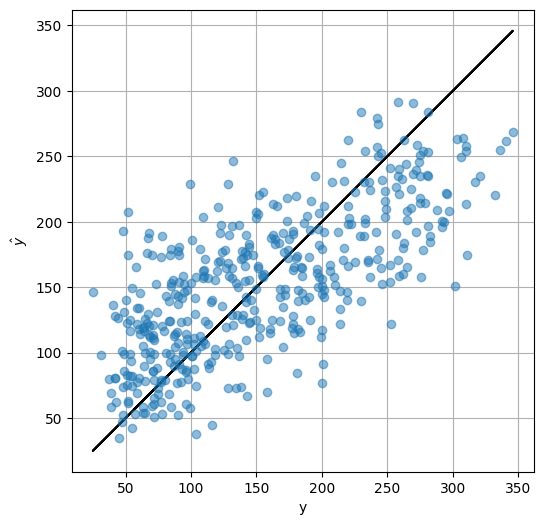

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(y, y, 'k')
plt.plot(y, X.dot(theta_opt), 'o', alpha=0.5)
plt.xlabel('y')
plt.ylabel(r'$\hat{y}$')
plt.axis('square')
plt.grid()

이제 이 모델을 활용하여 새로운 환자가 들어왔을 때 ($X_\text{new}$) 그 환자의 미래 1년간 당뇨병 진행도를 예측해 보자.Now suppose we got a new medical record  from a new patient. 새 환자의 당뇨병 진행도는 $\hat{y}_\text{new}=X_\text{new}\theta^*$를 통해 쉽게 예측할 수 있으며, 이를 통해 대략적으로 이 환자가 당뇨병에 대하 얼마나 취약한지 예상할 수 있다.

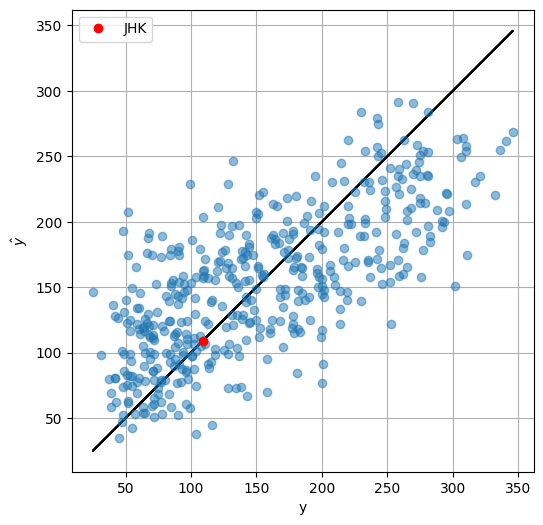

In [ ]:
# note that each feature represents
# u1:  age
# u2:  sex
# u3:  bmi         body mass index
# u4:  map	       mean arterial pressure
# u5:  s1 (tc) :   total cholesterol
# u6:  s2 (ldl):   low density lipoprotein
# u7:  s3 (hdl):   high density lipoprotein
# u8:  s4 (tch):
# u9:  s5 (ltg):
# u10: s6 (glu):
# features:      age  sex      bmi   map      tc      ldl     hdl   tch       ltg    glu
X_JHK = np.array([41,   1,    18.3,   90,    171,    80.0,   74.9,    2,     4.75,  90.0])
X_JHK = np.hstack((1, X_JHK))

y_JHK = X_JHK.dot(theta_opt)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(y, y, 'k')
plt.plot(y, X.dot(theta_opt), 'o', alpha=0.5)
plt.plot(y_JHK, y_JHK, 'ro', label='JHK')
plt.xlabel('y')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.axis('square')
plt.grid()